In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Low Pass


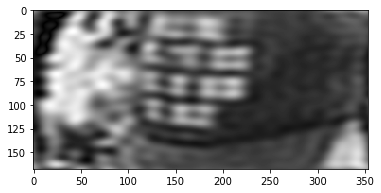

High Pass


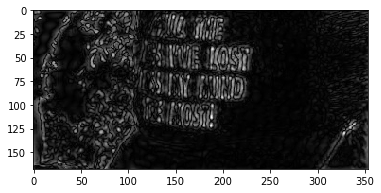

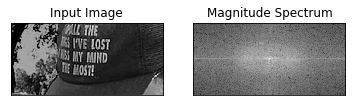

In [2]:
#Task 1 Low pass and high pass
def butter2d_lp(shape, f, n, pxd=1):
    """Designs an n-th order lowpass 2D Butterworth filter with cutoff
   frequency f. pxd defines the number of pixels per unit of frequency (e.g.,
   degrees of visual angle)."""
    pxd = float(pxd)
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols)  * cols / pxd
    y = np.linspace(-0.5, 0.5, rows)  * rows / pxd
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
    filt = 1 / (1.0 + (radius / f)**(2*n))
    return filt





def ideal2d_lp(im, f,name, pxd=1,n=2):
    """Designs an ideal filter with cutoff frequency f. pxd defines the number
    of pixels per unit of frequency (e.g., degrees of visual angle)."""
    pxd = float(pxd)
    rows, cols = im.shape
    x = np.linspace(-0.5, 0.5, cols)  * cols / pxd
    y = np.linspace(-0.5, 0.5, rows)  * rows / pxd
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
    if name=="low":
        filt = np.ones((im.shape[0],im.shape[1],2))
        filt[radius>f] = 0
    elif name=="high":
        filt = np.zeros((im.shape[0],im.shape[1],2))
        filt[radius>f] = 1    
    
    return filt




def filter(im,name):
    rows, cols = im.shape
    crow,ccol = rows/2 , cols/2
    # create a mask first, center square is 1, remaining all zeros
    dft = cv2.dft(np.float32(im),flags = cv2.DFT_COMPLEX_OUTPUT)
    fshift = np.fft.fftshift(dft)
    
    if name=="low":
        mask=ideal2d_lp(im,15,"low")
    elif name=="high":
        mask=ideal2d_lp(im,15,"high")
    result = fshift*mask
    f_ishift = np.fft.ifftshift(result)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    return img_back
im=cv2.imread("Cap.jpg",0)
dft = cv2.dft(np.float32(im),flags = cv2.DFT_COMPLEX_OUTPUT)
fshift = np.fft.fftshift(dft)


def freq_spectru(im):
    f = np.fft.fft2(im)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))

    plt.subplot(121),plt.imshow(im, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()


print "Low Pass" 
img_back=filter(im,"low") 
plt.imshow(img_back,cmap="gray")
plt.show()


print "High Pass" 
img_back=filter(im,"high") 
plt.imshow(img_back,cmap="gray")
plt.show()

freq_spectru(im)

 